In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial.transform import Rotation as R
from scipy.spatial.transform import Slerp

%matplotlib widget


def plot_vector(unit_vectors):
    # Create a figure and a 3D subplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create spherical coordinates
    u = np.linspace(0, 2 * np.pi, 20)
    v = np.linspace(0, np.pi, 20)
    u, v = np.meshgrid(u, v)

    # Convert spherical coordinates to Cartesian coordinates for unit sphere
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)

    # Plot the unit sphere
    ax.plot_surface(x, y, z, color = 'b', alpha=0.2)
    
    #plot meshgrid
    ax.plot_wireframe(x, y, z, color = 'k', alpha=0.1)

    # Define a list of colors
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    # Plot unit vectors
    for i, unit_vector in enumerate(unit_vectors):
        # Normalize the vector to make it a unit vector
        unit_vector = unit_vector / np.linalg.norm(unit_vector)
        
        # Plot the unit vector as a quiver with a different color
        color = colors[i % len(colors)]  # Cycle through colors
        ax.quiver(0, 0, 0, unit_vector[0], unit_vector[1], unit_vector[2],color=color)

    # Plot the origin
    ax.plot([0], [0], [0], marker='+', color='r', label='Origin')

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set plot title
    ax.set_title('Unit Sphere')
    ax.axis('equal')

    # Enable interactive rotation, panning, and zooming
    ax.view_init(elev=20, azim=30)
    ax.mouse_init()

    # Show the plot
    plt.show()

    return ax

def euler2rotm(euler_angs):
    roll = np.deg2rad(euler_angs[0])
    pitch = np.deg2rad(euler_angs[1])
    yaw = np.deg2rad(euler_angs[2])
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(roll), -np.sin(roll)],
                    [0, np.sin(roll), np.cos(roll)]
                    ])

    R_y = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                    [0, 1, 0],
                    [-np.sin(pitch), 0, np.cos(pitch)]
                    ])

    R_z = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                    [np.sin(yaw), np.cos(yaw), 0],
                    [0, 0, 1]
                    ])

    R = R_z @ R_y @ R_x

    return R

def plot_sphere_line(ax, start_point, end_point, num_points=100):

    # Parametrically define the line points
    t = np.linspace(0, 1, num_points)
    line_points = (1 - t)[:, np.newaxis] * start_point + t[:, np.newaxis] * end_point

    # Map line points to the sphere's surface
    line_points /= np.linalg.norm(line_points, axis=1, keepdims=True)

    # Plot the line on the sphere
    ax.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2], color='m', label='Line on Sphere')

    for i, unit_vector in enumerate(line_points):
        # Normalize the vector to make it a unit vector
        if i%10==0:
            unit_vector = unit_vector / np.linalg.norm(unit_vector)
            # Define a list of colors
            # colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
            # Plot the unit vector as a quiver with a different color
            # color = colors[i % len(colors)]
            ax.quiver(0, 0, 0, unit_vector[0], unit_vector[1], unit_vector[2],color='m', alpha =0.2)

    # print(line_points)

def interpolate_rpy(start_rpy, end_rpy, num_points):
    # Convert RPY angles to rotation matrices
    start_end = R.from_euler('xyz', [list(start_rpy), list(end_rpy)], degrees=True)
    
    # Create a Slerp object and perform interpolation
    slerp = Slerp([0, 2], start_end)
    inter_time = np.linspace(0, 2, num_points)
    interpolated_rotations = slerp(inter_time)
    
    # Convert interpolated rotations to RPY angles
    interpolated_rpy_angles = interpolated_rotations.as_euler('xyz', degrees=True)
    
    return interpolated_rpy_angles



[[-0.49240388 -0.86270924  0.11520062]
 [ 0.41317591 -0.11520062  0.9033352 ]
 [-0.76604444  0.49240388  0.41317591]]
[-0.22892184  0.49092447  0.71077078  0.44876815]


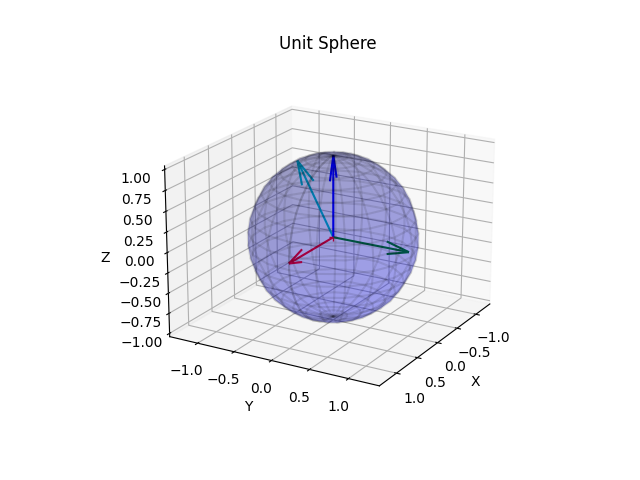

In [27]:
z_ax = np.array([0, 0, 1])
y_ax = np.array([0, 1, 0])
x_ax = np.array([1, 0, 0]) 

rpy = np.array([50, 50, 140])  #destination RPY angles  ###Change values here###

r = euler2rotm(rpy)
qat = R.from_euler('xyz', rpy, degrees=True).as_quat()

u_vec = r@z_ax

u_vec = euler2rotm(np.array([90, 0, 0]))@u_vec

print(r)
print(qat)
# Get the existing subplot using the plot_vector function
ax = plot_vector([x_ax, y_ax, z_ax, u_vec])

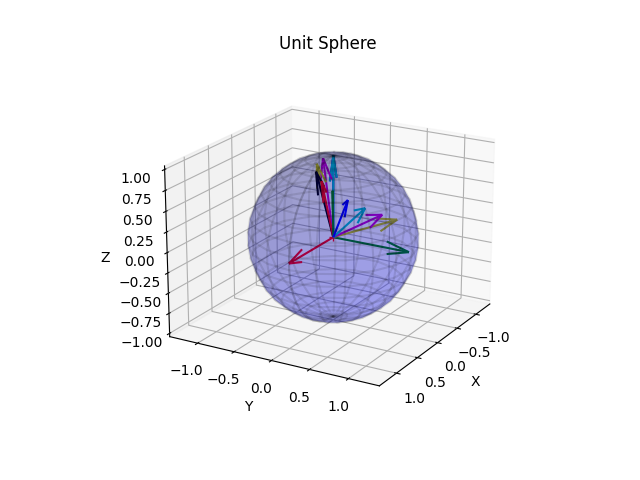

In [28]:
#linear interpolation
import numpy as np
from scipy.spatial.transform import Rotation as R

# Define start and end RPY angles and number of points
start_rpy = np.array([0, 0, 0])  # Start RPY angles in degrees
end_rpy = rpy  # End RPY angles in degrees
num_points = 10  # Number of points for interpolation


# Interpolate Euler angles directly
interpolated_rpy_angles = []
for t in np.linspace(0, 1, num_points):
    intermediate_rpy = (1 - t) * start_rpy + t * end_rpy  
    interpolated_rpy_angles.append(intermediate_rpy)

euls_list = [x_ax, y_ax, z_ax]
for euls in interpolated_rpy_angles:
    euls_list.append(euler2rotm(np.array([euls[0], euls[1], euls[2]]))@z_ax)
    # print(euls)

ax = plot_vector(euls_list)

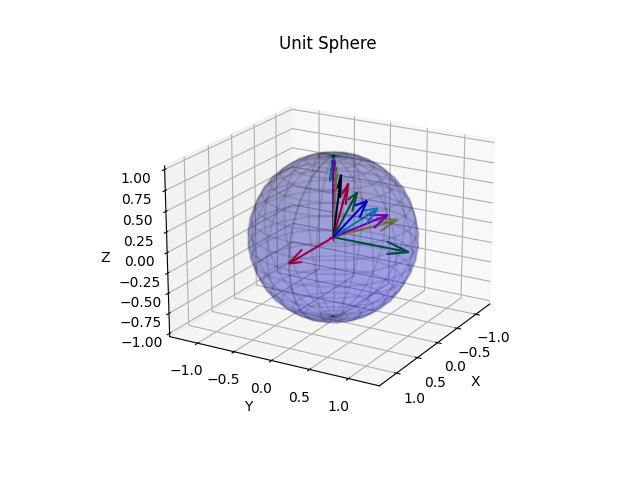

In [29]:
# With Spherical linear interpolation

# Define start and end RPY angles and number of points
start_rpy = np.array([0, 0, 0])  # Start RPY angles in degrees
end_rpy = rpy  # End RPY angles in degrees
num_points = 10  # Number of points for interpolation

interp_rot = interpolate_rpy(start_rpy, end_rpy, num_points)  #slerp function

euls_list = [x_ax, y_ax, z_ax]
for euls in interp_rot:
    # print(euler2rotm(euls[0], euls[1], euls[2]))
    euls_list.append(euler2rotm(euls)@z_ax)

ax = plot_vector(euls_list)




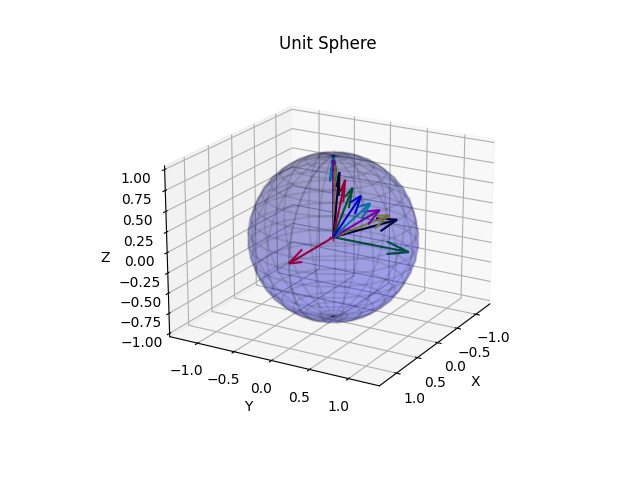

In [30]:
def quaternion_slerp(q0, q1, t):
    # Compute the dot product between the two quaternions
    dot = np.dot(q0, q1)
    
    DOT_THRESHOLD = 0.9995
    if dot > DOT_THRESHOLD:
        # Linearly interpolate and normalize if inputs are too close
        result = q0 + t * (q1 - q0)
        result /= np.linalg.norm(result)
        return result
    
    # Clamp the dot product to stay within the domain of acos()
    dot = np.clip(dot, -1, 1)
    
    # Compute theta_0 and theta
    theta_0 = np.arccos(dot)
    theta = theta_0 * t
    
    # Compute intermediate quaternion v2
    v2 = q1 - q0 * dot
    v2 /= np.linalg.norm(v2)
    
    # Slerp interpolation
    result = q0 * np.cos(theta) + v2 * np.sin(theta)
    
    return result

# Define start and end RPY angles (in degrees)
start_rpy = np.array([0, 0, 0])
end_rpy = rpy

# Convert RPY angles to quaternions
start_quat = R.from_euler('xyz', start_rpy, degrees=True).as_quat()
end_quat = R.from_euler('xyz', end_rpy, degrees=True).as_quat()

euls_list = [x_ax, y_ax, z_ax]
# Perform Slerp interpolation for different values of t
num_points = 10
for i in range(num_points + 1):
    t = i / num_points
    interpolated_quat = quaternion_slerp(start_quat, end_quat, t)
    interpolated_rpy = R.from_quat(interpolated_quat).as_euler('xyz', degrees=True)
    # print(f"t = {t:.2f}, Interpolated RPY angles: {interpolated_rpy}")
    euls_list.append(euler2rotm(interpolated_rpy)@z_ax)


# for vec in euls_list:
#     print(vec)

ax = plot_vector(euls_list)


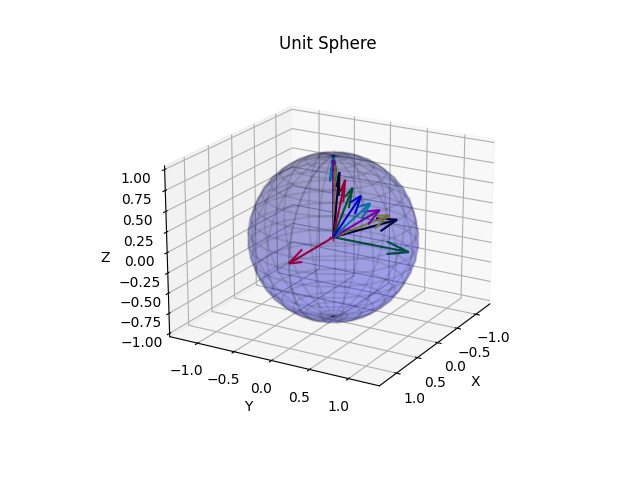

In [31]:
class Quaternion:
    def __init__(self, x, y, z, w):
        self.x = x
        self.y = y
        self.z = z
        self.w = w

def to_quaternion(rpy):
    # rpy = np.deg2rad(rpy)
    rpy.roll = np.deg2rad(rpy.roll)
    rpy.pitch = np.deg2rad(rpy.pitch)
    rpy.yaw = np.deg2rad(rpy.yaw)

    cr = np.cos(rpy.roll * 0.5)
    sr = np.sin(rpy.roll * 0.5)
    cp = np.cos(rpy.pitch * 0.5)
    sp = np.sin(rpy.pitch * 0.5)
    cy = np.cos(rpy.yaw * 0.5)
    sy = np.sin(rpy.yaw * 0.5)

    q = Quaternion(
        sr * cp * cy - cr * sp * sy,
        cr * sp * cy + sr * cp * sy,
        cr * cp * sy - sr * sp * cy,
        cr * cp * cy + sr * sp * sy
    )

    return q

class EulerAngles:
    def __init__(self, roll, pitch, yaw):
        self.roll = roll
        self.pitch = pitch
        self.yaw = yaw

def to_euler_angles(q):
    angles = EulerAngles(0,0,0)

    # roll (x-axis rotation)
    sinr_cosp = 2 * (q.w * q.x + q.y * q.z)
    cosr_cosp = 1 - 2 * (q.x * q.x + q.y * q.y)
    angles.roll = np.arctan2(sinr_cosp, cosr_cosp)

    # pitch (y-axis rotation)
    sinp = np.sqrt(1 + 2 * (q.w * q.y - q.x * q.z))
    cosp = np.sqrt(1 - 2 * (q.w * q.y - q.x * q.z))
    angles.pitch = 2 * np.arctan2(sinp, cosp) - np.pi / 2

    # yaw (z-axis rotation)
    siny_cosp = 2 * (q.w * q.z + q.x * q.y)
    cosy_cosp = 1 - 2 * (q.y * q.y + q.z * q.z)
    angles.yaw = np.arctan2(siny_cosp, cosy_cosp)

    # Convert to degrees
    angles.roll = np.rad2deg(angles.roll)
    angles.pitch = np.rad2deg(angles.pitch)
    angles.yaw = np.rad2deg(angles.yaw)

    return angles

def quaternion_slerp(qstart, qend, t):
    # Compute the dot product between the two quaternions
    q0 = np.array([qstart.x, qstart.y, qstart.z, qstart.w])
    q1 = np.array([qend.x, qend.y, qend.z, qend.w])

    dot = np.dot(q0, q1)
    
    DOT_THRESHOLD = 0.9995
    if dot > DOT_THRESHOLD:
        # Linearly interpolate and normalize if inputs are too close
        result = q0 + t * (q1 - q0)
        result /= np.linalg.norm(result)
        return result
    
    # Clamp the dot product to stay within the domain of acos()
    dot = np.clip(dot, -1, 1)
    
    # Compute theta_0 and theta
    theta_0 = np.arccos(dot)
    theta = theta_0 * t
    
    # Compute intermediate quaternion v2
    v2 = q1 - q0 * dot
    v2 /= np.linalg.norm(v2)
    
    # Slerp interpolation
    result = q0 * np.cos(theta) + v2 * np.sin(theta)

    q_result = Quaternion(result[0], result[1], result[2], result[3])
    
    return q_result


# Define start and end RPY angles (in degrees)
start_rpy = EulerAngles(0, 0, 0)
end_rpy = EulerAngles(rpy[0], rpy[1], rpy[2])


start_quat = to_quaternion(start_rpy)
end_quat = to_quaternion(end_rpy)


euls_list = [x_ax, y_ax, z_ax]
# Perform Slerp interpolation for different values of t
num_points = 10
for i in range(num_points + 1):
    t = i / num_points
    interpolated_quat = quaternion_slerp(start_quat, end_quat, t)
    interpolated_rpy = to_euler_angles(interpolated_quat)
    # print(f"t = {t:.2f}, Interpolated RPY angles: {interpolated_rpy}")
    euls_list.append(euler2rotm(np.array([interpolated_rpy.roll, interpolated_rpy.pitch, interpolated_rpy.yaw]))@z_ax)


ax = plot_vector(euls_list)

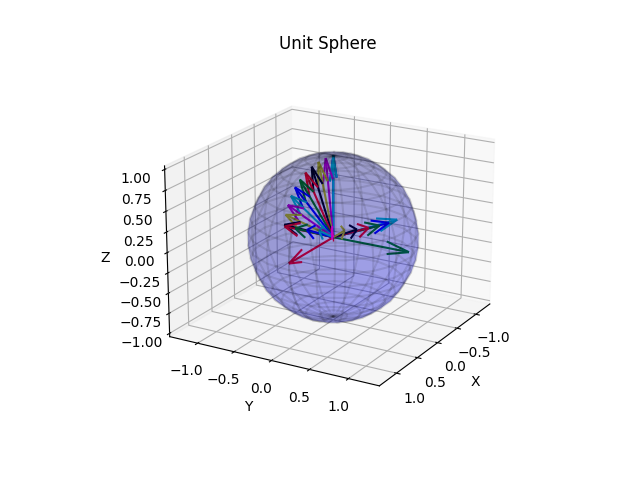

<Axes3D: title={'center': 'Unit Sphere'}, xlabel='X', ylabel='Y', zlabel='Z'>

In [32]:
euls_list = [[ 1 , 0 , 0 ] ,
[ 0 , 1 , 0 ] ,
[ 0 , 0 , 1 ] ,
[ 0.0 , 0.0 , 1.0 ] ,
[ 0.10889859494501754 , -0.0372175929795035 , 0.9933559013726214 ] ,
[ 0.21773527310682755 , -0.06961203505483832 , 0.9735222213286244 ] ,
[ 0.32489461291523186 , -0.0967025077981833 , 0.9407933436649113 ] ,
[ 0.42878608889758285 , -0.11808691758856807 , 0.8956550507100067 ] ,
[ 0.527867679245643 , -0.1334478637351153 , 0.8387773130410437 ] ,
[ 0.6206687534609339 , -0.14255734953521618 , 0.7710043453643725 ] ,
[ 0.7058119003659288 , -0.1452801663431878 , 0.6933420761565909 ] ,
[ 0.7820333724961895 , -0.141575900420963 , 0.6069432170493626 ] ,
[ 0.8482018434250818 , -0.13149953278389068 , 0.5130901535674912 ] ,
[ 0.9033351996132097 , -0.11520062313835944 , 0.41317591116653457 ],
[ 0.9112404430188237 , -0.10761407985961612 , 0.3975676858383061 ] ,
[ 0.9159627217596482 , 0.034787348237854905 , 0.39975258942155123 ] ,
[ 0.8985598327830551 , 0.1762004343362244 , 0.4019249107092189 ] ,
[ 0.8594521659631287 , 0.31320915770820423 , 0.4040321743982819 ] ,
[ 0.7995844188815326 , 0.4425038908520485 , 0.40602347673832845 ] ,
[ 0.7204027764039624 , 0.5609613479352046 , 0.4078507151791949 ] ,
[ 0.623819976165858 , 0.6657200319077008 , 0.40946975035188826 ] ,
[ 0.5121691038569234 , 0.7542493577601378 , 0.41084147231361073 ] ,
[ 0.3881472344406572 , 0.8244107821622724 , 0.4119327453003216 ] ,
[ 0.25475028073002426 , 0.8745094628146654 , 0.41271720816508106 ] ,
[ 0.1152006231383599 , 0.9033351996132096 , 0.41317591116653457 ] ]

plot_vector(euls_list)

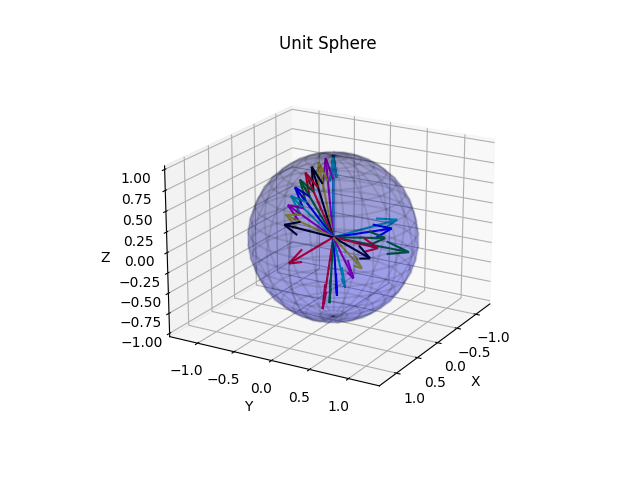

<Axes3D: title={'center': 'Unit Sphere'}, xlabel='X', ylabel='Y', zlabel='Z'>

In [33]:
euls_list = [[ 1 , 0 , 0 ] ,
[ 0 , 1 , 0 ] ,
[ 0 , 0 , 1 ] ,
[0.0000, 0.0000, 1.0000],
[0.1089, -0.0372, 0.9934],
[0.2177, -0.0696, 0.9735],
[0.3249, -0.0967, 0.9408],
[0.4288, -0.1181, 0.8957],
[0.5279, -0.1334, 0.8388],
[0.6207, -0.1426, 0.7710],
[0.7058, -0.1453, 0.6933],
[0.7820, -0.1416, 0.6069],
[0.8482, -0.1315, 0.5131],
[0.9033, -0.1152, 0.4132],
[0.7597, 0.2978, -0.5780],
[0.7824, 0.4016, -0.4761],
[0.7834, 0.5011, -0.3677],
[0.7628, 0.5941, -0.2554],
[0.7210, 0.6782, -0.1421],
[0.6591, 0.7514, -0.0304],
[0.5786, 0.8120, 0.0769],
[0.4814, 0.8584, 0.1772],
[0.3699, 0.8895, 0.2681],
[0.2469, 0.9046, 0.3474],
[0.1152, 0.9033, 0.4132]]

plot_vector(euls_list)

In [44]:
np.set_printoptions(precision=2)
def q_mult(q1, q2):
    # w1, x1, y1, z1 = q1
    # w2, x2, y2, z2 = q2
    x = q1.w * q2.x + q1.x * q2.w + q1.y * q2.z - q1.z * q2.y
    y = q1.w * q2.y + q1.y * q2.w + q1.z * q2.x - q1.x * q2.z
    z = q1.w * q2.z + q1.z * q2.w + q1.x * q2.y - q1.y * q2.x
    w = q1.w * q2.w - q1.x * q2.x - q1.y * q2.y - q1.z * q2.z

    q_result = Quaternion(x,y,z,w)
    
    #normalize quaternion
    q_result_norm = np.sqrt(q_result.x**2 + q_result.y**2 + q_result.z**2 + q_result.w**2)
    q_result.x = q_result.x / q_result_norm
    q_result.y = q_result.y / q_result_norm
    q_result.z = q_result.z / q_result_norm
    q_result.w = q_result.w / q_result_norm

    return q_result

def q_conjugate(q):
    q_result = Quaternion(-q.x,-q.y,-q.z,q.w)
    return q_result

# def qv_mult(q1, v1):
#     q2 = (0.0,) + v1
#     return q_mult(q_mult(q1, q2), q_conjugate(q1))[1:]

def quaternion_rotation_matrix(q):
    """
    Covert a quaternion into a full three-dimensional rotation matrix.
 
    Input
    :param Q: A 4 element array representing the quaternion (q0,q1,q2,q3) 
 
    Output
    :return: A 3x3 element matrix representing the full 3D rotation matrix. 
             This rotation matrix converts a point in the local reference 
             frame to a point in the global reference frame.
    """
    # Extract the values from Q
    q0 = q.w
    q1 = q.x
    q2 = q.y
    q3 = q.z
     
    # First row of the rotation matrix
    r00 = 2 * (q0 * q0 + q1 * q1) - 1
    r01 = 2 * (q1 * q2 - q0 * q3)
    r02 = 2 * (q1 * q3 + q0 * q2)
     
    # Second row of the rotation matrix
    r10 = 2 * (q1 * q2 + q0 * q3)
    r11 = 2 * (q0 * q0 + q2 * q2) - 1
    r12 = 2 * (q2 * q3 - q0 * q1)
     
    # Third row of the rotation matrix
    r20 = 2 * (q1 * q3 - q0 * q2)
    r21 = 2 * (q2 * q3 + q0 * q1)
    r22 = 2 * (q0 * q0 + q3 * q3) - 1
     
    # 3x3 rotation matrix
    rot_matrix = np.array([[r00, r01, r02],
                           [r10, r11, r12],
                           [r20, r21, r22]])
                            
    return rot_matrix

R1 = euler2rotm([50,50,50])
R2 = euler2rotm([0,0,90])


q0 = to_quaternion(EulerAngles(50,50,50))
q1 = to_quaternion(EulerAngles(0,0,90))

R1_quat = quaternion_rotation_matrix(q0)
R2_quat = quaternion_rotation_matrix(q1)

q_res = q_mult(q1,q0)

print("R2: \n", R2, "\nR2_quat: \n", R2_quat)
print("R1: \n", R1, "\nR1_quat: \n", R1_quat)
print("R2@R1: \n", R2@R1)
print("q_res: \n", quaternion_rotation_matrix(q_res))



R2: 
 [[ 6.12e-17 -1.00e+00  0.00e+00]
 [ 1.00e+00  6.12e-17  0.00e+00]
 [ 0.00e+00  0.00e+00  1.00e+00]] 
R2_quat: 
 [[ 2.22e-16 -1.00e+00  0.00e+00]
 [ 1.00e+00  2.22e-16  0.00e+00]
 [ 0.00e+00  0.00e+00  1.00e+00]]
R1: 
 [[ 0.41 -0.12  0.9 ]
 [ 0.49  0.86 -0.12]
 [-0.77  0.49  0.41]] 
R1_quat: 
 [[ 0.41 -0.12  0.9 ]
 [ 0.49  0.86 -0.12]
 [-0.77  0.49  0.41]]
R2@R1: 
 [[-0.49 -0.86  0.12]
 [ 0.41 -0.12  0.9 ]
 [-0.77  0.49  0.41]]
q_res: 
 [[-0.49 -0.86  0.12]
 [ 0.41 -0.12  0.9 ]
 [-0.77  0.49  0.41]]
